In [19]:
%matplotlib inline

In [20]:
import numpy as np
import scipy as sp
from scipy.stats import multivariate_normal
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

In [21]:
X = np.linspace(0, 10, 1000).reshape(-1,1)
#y = np.squeeze(x*np.sin(x))
y = X*np.sin(X)

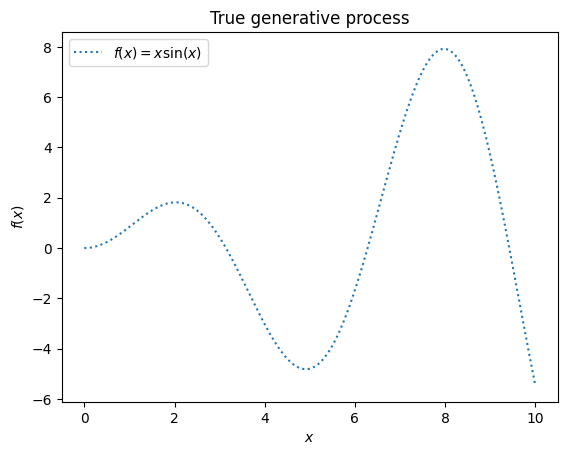

In [22]:
plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("True generative process")

In [23]:
rng = np.random.RandomState(1)
training_indices = rng.choice(np.arange(y.size), size=6, replace=False)
X_train, y_train = X[training_indices], y[training_indices]

In [24]:
kernel = 1 * RBF(length_scale=10.0)#, length_scale_bounds=
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


4.27**2 * RBF(length_scale=1e-05)

gaussian_process.fitでRBFカーネルのパラメータ最適化がされる

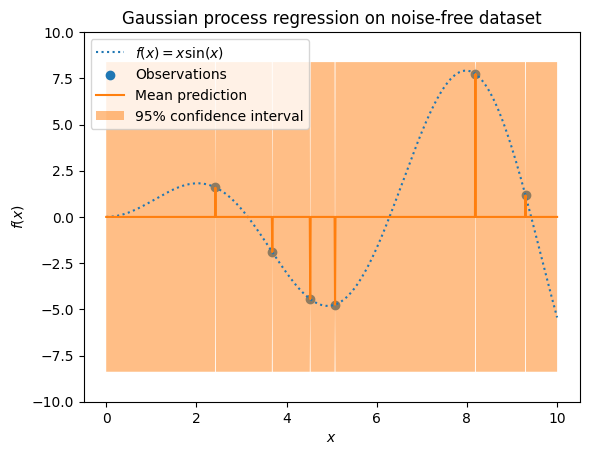

In [25]:
mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
#plt.plot(X, mean_prediction - std_prediction, label="Mean prediction")
plt.plot(X, mean_prediction, label="Mean prediction")
conf_rate = 1.96
#conf_rate = 2
plt.fill_between(
    X.ravel(),
    mean_prediction - conf_rate * std_prediction,
    mean_prediction + conf_rate * std_prediction,
    alpha = 0.5,
    label=r"95% confidence interval",
    #label=r"%0.3f"%(conf_rate),
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.ylim(-10, 10)
_ = plt.title("Gaussian process regression on noise-free dataset")

/tmp/ipykernel_42/4277073245.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


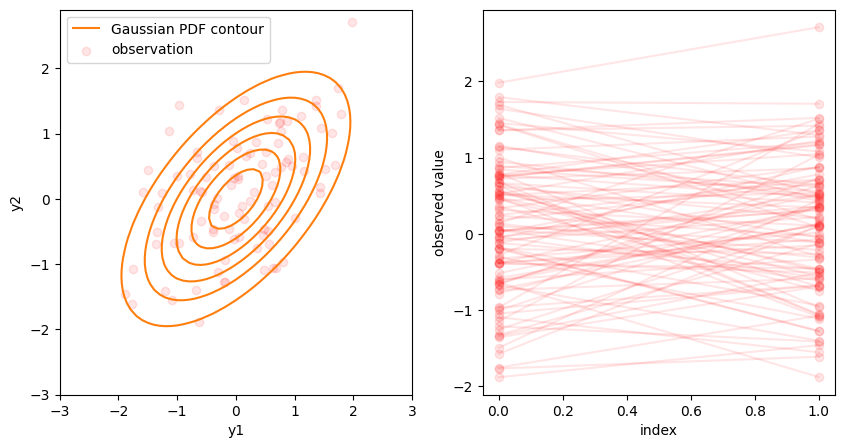

In [26]:
np.random.seed(42)
n_dim = 2
v = np.fromfunction(
    function=lambda i, j: np.exp(- (i - j) ** 2 / 2.),
    shape=(n_dim, n_dim),
)
y = multivariate_normal.rvs(cov=v, size=100)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

grid_y1 = np.arange(-3., 3., 0.1)
grid_y2 = np.arange(-3., 3., 0.1)
grid_y12 = np.array(np.meshgrid(grid_y1, grid_y2))
p_y12 = np.apply_along_axis(lambda grid: multivariate_normal.pdf(grid, cov=v), 0, grid_y12)
_cntr = ax1.contour(grid_y1, grid_y2, p_y12, colors='C1')
_l_cntr, _ = _cntr.legend_elements()
_sctr = ax1.scatter(y[:, 0], y[:, 1], alpha=0.1, color='red')
ax1.set_xlim(-3., 3.)
ax1.set_xlabel('y1')
ax1.set_ylabel('y2')
ax1.legend([_l_cntr[0], _sctr], ['Gaussian PDF contour', 'observation'])

for j in range(y.shape[1]):
    ax2.scatter(np.full_like(y[:, j], fill_value=j), y[:, j], alpha=0.1, color='red')
for i in range(y.shape[0]):
    ax2.plot(np.arange(0, n_dim, 1), y[i, :], alpha=0.1, color='red')
ax2.set_xlabel('index')
ax2.set_ylabel('observed value')

fig.show()

/tmp/ipykernel_42/95740971.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


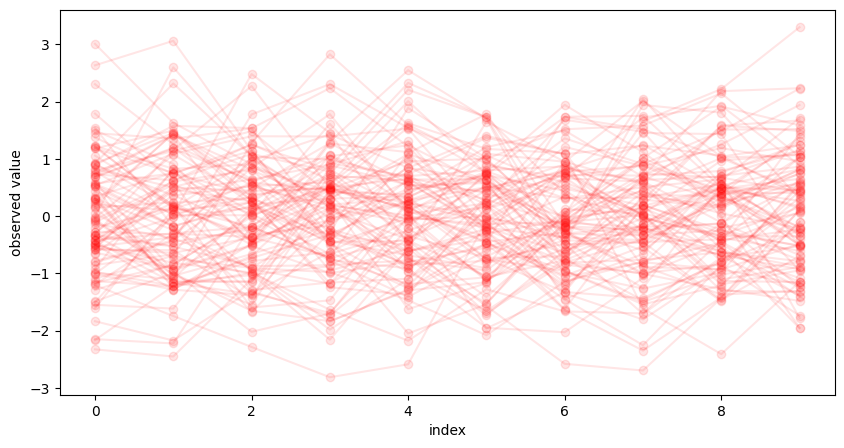

In [44]:
np.random.seed(42)
n_dim = 10
v = np.fromfunction(
    function=lambda i,j: np.exp(-(i-j)**2 /2.),
    shape=(n_dim, n_dim),
)
y = multivariate_normal.rvs(cov=v, size=100)
fig,ax = plt.subplots(1, 1, figsize=(10,5))

for j in range(y.shape[1]):
    ax.scatter(np.full_like(y[:, j], fill_value=j), y[:, j], alpha=0.1, color='red')
for i in range(y.shape[0]):
    ax.plot(np.arange(0, n_dim, 1), y[i,:], alpha=0.1, color='red')
ax.set_xlabel('index')
ax.set_ylabel('observed value')
fig.show()

In [27]:
np.fromfunction(lambda i, j: i, (2,2), dtype=float)

array([[0., 0.],
       [1., 1.]])

In [33]:
for i in range(4):
    print(lambda i, i**2)

SyntaxError: invalid syntax (858409751.py, line 2)

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  2.,  3.,  4.],
       [ 0.,  2.,  4.,  6.,  8.],
       [ 0.,  3.,  6.,  9., 12.]])

In [144]:
np.random.seed(40)
n_dim=2
#平均
mean = np.array([0,5])
# 共分散の計算 i,j番目の多変量入力ｘに関して
cov = np.fromfunction(
    function=lambda i,j: np.exp(- (i-j)**2 / 2.),
    shape=(n_dim, n_dim),
)
cov = np.array([[1,0.6],[0.6,1]])
print(cov)

# 多変量ガウス分布に従って、出力 y をランダム生成
#y = sp.multivariate_normal.rvs
#y = np.random.multivariate_normal(mean, cov, size=10)
#y = sp.stats.multivariate_normal(mean, cov).rvs(size=200)
#y.shape
def multivar_normal(x, mean, var):
    d = x.shape[1]
    f1 = 1/np.sqrt((2*np.pi)**d * np.linalg.det(var))
    f3 = []
    for xi in x:
        f2i = np.exp(-(1/2) * (xi-mean).T @ var.T @ (xi-mean))
        print(f2i)
        break
        f3.append(f1*f2i)
    return f3

#x = np.array([0.5, 0.3])
#x = np.linspace(-10, 10, 100)
x = (np.random.rand(10,2) - 0.5)*10
print(x.shape[1])
mean = np.array([4, 0])

y =  multivar_normal(x, mean, cov)
print(y)

#np.linalg.det(cov)
np.random.multivariate_normal(mean, cov, size=1)

[[1.  0.6]
 [0.6 1. ]]
2
5.495043395285531e-16
[]


array([[ 4.74818917, -0.39219084]])

In [152]:
dif = x-mean
print(dif[0] @ cov.T @ dif[0].T)
#print(dif.T@ cov.T @ dif)

70.27503000569823


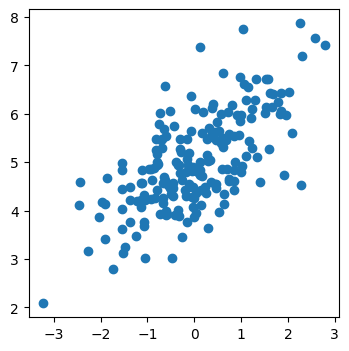

In [93]:
# 多変量ガウス分布の出力を3次元プロット
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)#, projection='3d')
ax.scatter(y[:,0],y[:,1])

In [155]:
X_train



array([[5.07507508],
       [8.18818819],
       [4.52452452],
       [3.68368368],
       [2.42242242],
       [9.2992993 ]])